### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:

### Objetivos:

* Generar un corpus con todos los documentos. 

* Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

* Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras? 

* Hacer lo mismo con n-gramas.

* Visualizar la frecuencia de palabras en una nube de palabras.

* Elaborar una breve conclusión de lo encontrado

Fecha de Entrega: 6 de junio de 2021

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
root=os.getcwd()
dirname=f'{root}\\Documentos'

In [3]:

def getListOfFiles(dirName):
    files = os.listdir(dirName)
    allFiles = list()
    for file in files:
        fullPath = dirName + "\\" + file
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles


def create_corpus(file_list):
    corpus=[]
    for file in file_list:
        f = open (file,'r', encoding="utf8")
        corpus.append(f.read())
    corpus=','. join(corpus)
    return corpus


def corpus_for_fuero(fuero):
    path_fuero=f'{dirname}\{fuero}'
    files = os.listdir(path_fuero)
    corpus=[]
    for file in files:
        path=f'{path_fuero}\{file}'
        f = open (path,'r', encoding="utf8")
        corpus.append(f.read())
    corpus=','. join(corpus)
    return corpus,files

def saveTxt(text, textFilename):
    textFile = open(textFilename, "w", encoding="utf-8")
    textFile.write(text)
    textFile.close()
    
    
def graph_frequency(dataframe):
    plt.figure(figsize=(10,6))
    sns.barplot(x=dataframe[:15].Token, y=dataframe[:15].Frecuencia, color='skyblue')
    plt.xticks(rotation=90)
    sns.despine()

def obtain_tokens_and_dataframe(corpus):
    tokens=[t for t in corpus.split()]
    freq = nltk.FreqDist(tokens)
    data = pd.DataFrame(freq.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
    return data

En esta celda guardamos todas las funciones que iremos utilizando a lo largo de la notebook, con el fin de que sean reutilizables

**Ejercicio 1**
Generar un corpus con todos los documentos.

In [19]:
files_list=getListOfFiles(dirname)


full_corpus=create_corpus(files_list)

fileDestino = 'Corpus'
saveTxt(full_corpus, fileDestino + ".txt")

**Ejercicio 2** Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf.

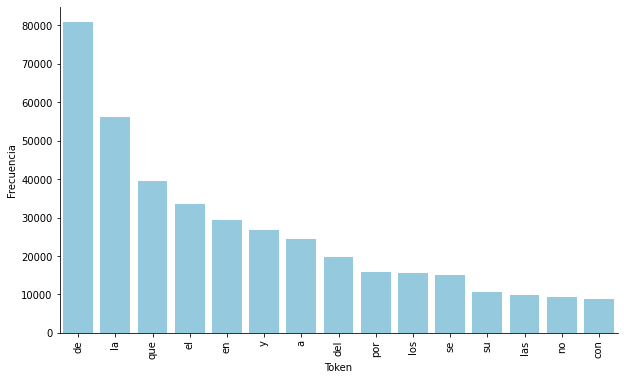

In [5]:
import nltk

full_data=obtain_tokens_and_dataframe(full_corpus)
graph_frequency(full_data)



Aqui podemos ver que se cumple en rasgos generales la ley de Zipf de que la frecuencia de palabras tiene una distribucion decreciente exponencial.
Y las palabras mas frecuentes son articulos, por lo que habria que realizar una limpieza para obtener palabras que aporten mayor informacion

**Ejercicio 3** Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras?

In [6]:
#Ejercicio 3
print('Tokens mas frecuentes')
display(full_data[:10])
print('Tokens menos frecuentes')
display(full_data[-10:])

Tokens mas frecuentes


,Token,Frecuencia
6,de,80830
62,la,56153
55,que,39528
90,el,33672
78,en,29487
35,y,26680
47,a,24418
31,del,19777
132,por,15979
54,los,15547


Tokens menos frecuentes


,Token,Frecuencia
37206,21/10/09,1
37209,verifica.,1
37212,26-29,1
37219,"""BAEZ",1
37220,"3240353,",1
37221,"112/16,",1
37222,Grasso,1
37223,"18-,",1
37224,103/109,1
67818,y551,1


Analisis del fuero familia

,Token,Frecuencia
6,de,38517
62,la,27210
55,que,19778
90,el,16588
78,en,13244
35,y,12679
47,a,11058
31,del,9160
54,los,8071
132,por,7916


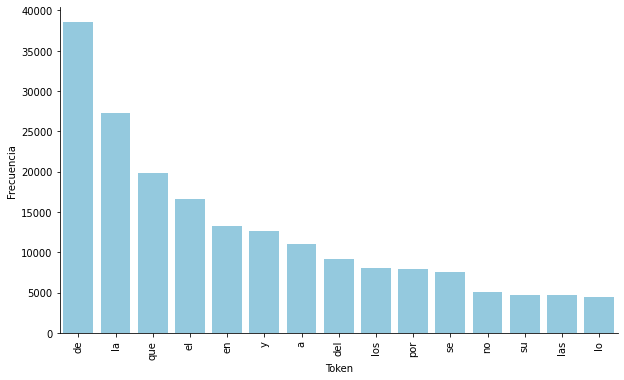

In [7]:
corpus_familia, files_familia=corpus_for_fuero('FAMILIA')
data_familia=obtain_tokens_and_dataframe(corpus_familia)
graph_frequency(data_familia)
data_familia[:10]

Analisis del fuero laboral

,Token,Frecuencia
6,de,3578
39,la,3306
108,el,1902
103,que,1675
35,en,1595
61,a,1423
54,y,1175
42,del,1088
83,por,1018
37,los,721


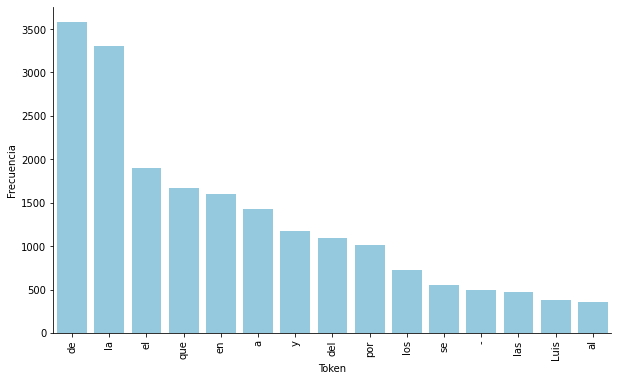

In [8]:
corpus_laboral,files_laboral=corpus_for_fuero('LABORAL')
data_laboral=obtain_tokens_and_dataframe(corpus_laboral)
graph_frequency(data_laboral)
data_laboral[:10]

Analisis del fuero menores

,Token,Frecuencia
10,de,13527
11,la,8882
16,y,5017
142,que,4886
56,el,4370
108,en,4337
99,a,4294
64,del,2994
115,los,2372
217,su,2283


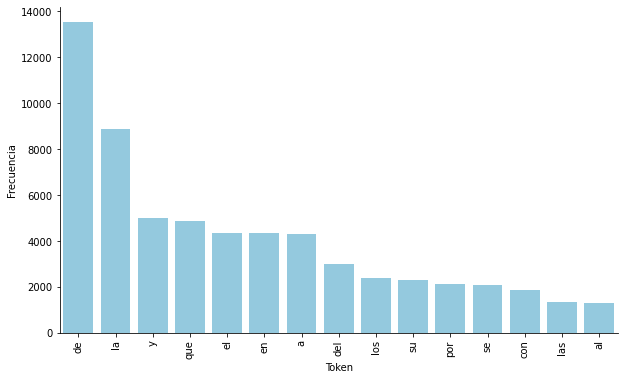

In [9]:
corpus_menores,files_menores=corpus_for_fuero('MENORES')
data_menores=obtain_tokens_and_dataframe(corpus_menores)
graph_frequency(data_menores)
data_menores[:10]

Analisis del fuero penal

,Token,Frecuencia
6,de,25208
32,la,16755
126,que,13189
60,el,10812
50,en,10311
74,y,7809
35,a,7643
39,del,6535
59,por,4902
48,se,4769


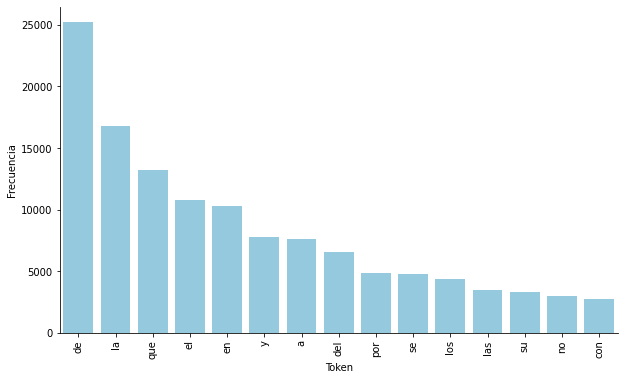

In [10]:
corpus_penal,files_penal=corpus_for_fuero('PENAL')
data_penal=obtain_tokens_and_dataframe(corpus_penal)
graph_frequency(data_penal)
data_penal[:10]

Por lo que vimos en los analisis de los 4 fueros, las palabras mas frecuentes se repiten en todos los fueros, ya que son articulos

**Ejercicio 4** Hacer lo mismo con n-gramas.

Analisis de bigramas

,Token,Frecuencia
413,"(de, la)",16840
356,"(a, la)",5950
137,"(en, el)",5112
59,"(de, los)",4564
583,"(en, la)",4178
...,...,...
158524,"(por, Fatlyf,)",1
158525,"(Fatlyf,, arribadas)",1
158526,"(arribadas, con)",1
158527,"(con, soluciones)",1


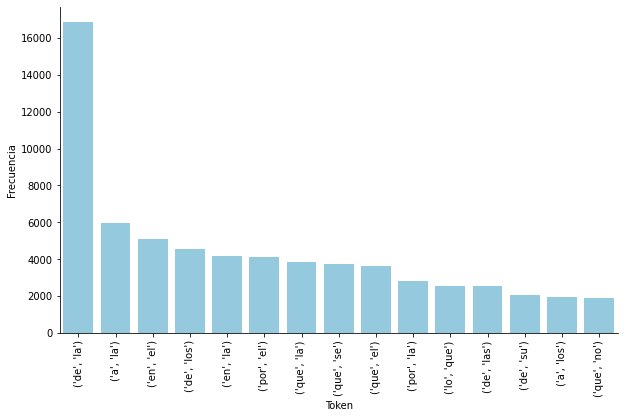

In [11]:
tokens =[t for t in full_corpus.split()]

bgs = nltk.bigrams(tokens)
fdist = nltk.FreqDist(bgs)


bigrams = pd.DataFrame(fdist.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams)
bigrams
#Existe tambien la funcion de nltk para trigramas

Se puede ver que los bigramas que mas se repiten, involucran la concatenacion de articulos

Analisis de trigramas

,Token,Frecuencia
530,"(por, lo, que)",817
8,"(de, dos, mil)",781
457,"(de, la, ley)",703
10359,"(de, la, Ley)",694
364,"(recurso, de, apelación)",586
...,...,...
268649,"(agravio,, en, cuanto)",1
268648,"(primer, agravio,, en)",1
268647,"(rechazo., a), Con)",1
268646,"(su, rechazo., a))",1


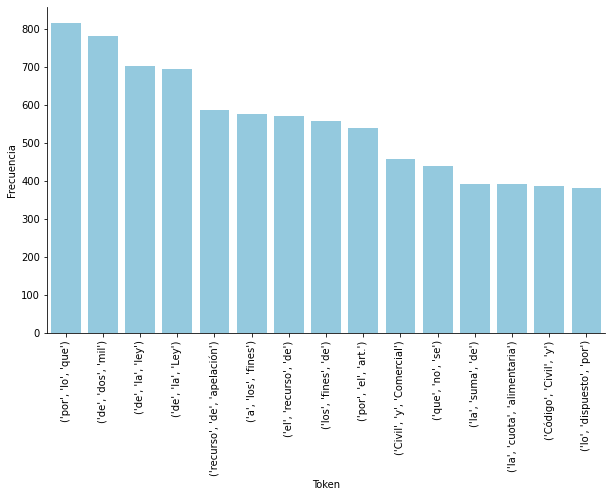

In [12]:
trigrams = nltk.trigrams(tokens)
fdist = nltk.FreqDist(trigrams)
trigram = pd.DataFrame(fdist.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram)
trigram

**Ejercicio 5** Visualizar la frecuencia de palabras en una nube de palabras.

(-0.5, 399.5, 199.5, -0.5)

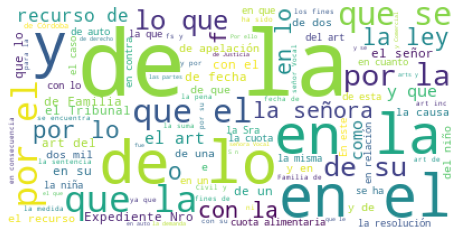

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=100).generate(full_corpus)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")

**Conclusiones**

En este primer análisis podemos ver que la mayor frecuencia de palabras en nuestro corpus son preposiciones y artículos. Esto también pasa cuando miramos la frecuencia en los bigramas.
Con este análisis no podemos sacar una descripción significativa sobre el corpus usado.
Tendremos que realizar una limpieza profunda de los datos para tener lograr un mejor entendimiento.